## Bank marketing problem: envelope color and bonus amount alloacation

## Import Libraries

In [60]:
# imports
import pandas as pd
import numpy as np
import random
import pdb # pdb.set_trace()

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## Data Generation

In [350]:
#data=[['Green','100$',],['bonus_amount',22],['Sahil',21],['Aryan',24]]
data=[['Green','100$','yes']]
df=pd.DataFrame(data,columns=['envelope_color','bonus_amount', 'customer_response'])

i=1
d = []
level_size=250000

# 1 million test results
# The average acceptance rate is ~20% by default, so, for instance, only rand numbers less than 0.2 result in a positive response from customers.
#I intentionally biased the results for the sake of this problem to study the features importance.

while i<=4*level_size:
    i=i+1
    if i<=level_size:
        randNumber = random.random()
        if randNumber < 0.1:
            cr='yes'
        else:
            cr='no'
        d.append(
            {
                'envelope_color': 'Green',
                'bonus_amount': '100$',
                'customer_response':  cr
            }
        )
    elif i>level_size and i<=2*level_size:
        randNumber = random.random()
        if randNumber < 0.2:
            cr='yes'
        else:
            cr='no'
        d.append(
            {
                'envelope_color': 'Green',
                'bonus_amount': '200$',
                'customer_response':  cr
            }
        )
    elif i>2*level_size and i<=3*level_size:
        randNumber = random.random()
        if randNumber < 0.15:
            cr='yes'
        else:
            cr='no'
        d.append(
            {
                'envelope_color': 'Orange',
                'bonus_amount': '100$',
                'customer_response':  cr
            }
        )
            
    else:
        randNumber = random.random()
        if randNumber < 0.25:
            cr='yes'
        else:
            cr='no'
        d.append(
            {
                'envelope_color': 'Orange',
                'bonus_amount': '200$',
                'customer_response':  cr
            }
        )
            

df=pd.DataFrame(d)
df

,envelope_color,bonus_amount,customer_response
0,Green,100$,yes
1,Green,100$,no
2,Green,100$,no
3,Green,100$,no
4,Green,100$,no
...,...,...,...
999995,Orange,200$,no
999996,Orange,200$,no
999997,Orange,200$,no
999998,Orange,200$,no


 ## One Hot Encoding

In [351]:
# here we convert the categorical data of the input into binary as we have two levels for each variable
df_input_binary=pd.get_dummies(df, columns=['envelope_color','bonus_amount'])

In [352]:
df_input_binary

,customer_response,envelope_color_Green,envelope_color_Orange,bonus_amount_100$,bonus_amount_200$
0,yes,1,0,1,0
1,no,1,0,1,0
2,no,1,0,1,0
3,no,1,0,1,0
4,no,1,0,1,0
...,...,...,...,...,...
999995,no,0,1,0,1
999996,no,0,1,0,1
999997,no,0,1,0,1
999998,no,0,1,0,1


## Lable encoder

In [369]:
# lable encoder

#encoding the levels of a categorical features into numeric values (here binary)
# I use lable encoding for the output y : customer_response

df_binary=df

le = preprocessing.LabelEncoder()
df_binary.envelope_color = le.fit_transform(df.envelope_color)
df_binary.bonus_amount = le.fit_transform(df.bonus_amount)
df_binary.customer_response = le.fit_transform(df.customer_response)


#cols = df_binary.columns.tolist()
#cols = cols[1:] + cols[:1]
#df_binary = df_binary[cols]

df_binary.head()

,envelope_color,bonus_amount,customer_response
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


## Train and Test split

In [370]:
X = df_binary.iloc[:,0:2]
X[0:10]
y = df_binary.iloc[:,2]
y[0:10]

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: customer_response, dtype: int64

In [371]:

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800000, 2)
(800000,)
(200000, 2)
(200000,)


## Normalization and Scaling

In [372]:
# normalize the data
sc = StandardScaler()
z_train = sc.fit_transform(x_train)
z_test = sc.transform(x_test)
print(z_train.shape)
print(y_train.shape)
print(z_test.shape)
print(y_test.shape)

(800000, 2)
(800000,)
(200000, 2)
(200000,)


## Model Training

## 1 - Logistic Regression 

In [358]:


def score_calc(model_name, label, prediction, prediction_probability):
    #pdb.set_trace()
    accuracy = round(accuracy_score(label, prediction)*100, 2)
    fpr, tpr, _ = roc_curve(label, prediction_probability)
    precision, recall, f_score, _ = precision_recall_fscore_support(label, prediction, average=None)
    precision = round(precision[1]*100, 2)
    recall = round(recall[1]*100, 2)
    f_score = round(f_score[1]*100, 2)
    print(model_name + " - Performance on validation data: ")
    print("\tAccuracy:\t" + str(accuracy))
    #print("\tPrecision:\t" + str(precision))
    #print("\tRecall:\t\t" + str(recall))
    #print("\tF_score:\t" + str(f_score))
    return accuracy, fpr, tpr

model_name = "Logistic Regression"
logreg_model=LogisticRegression(penalty='l2', max_iter=1000)


#logreg_model = LogisticRegression(solver='lbfgs')
logreg_model.fit(z_train, y_train)
test_pred = logreg_model.predict(z_test)
test_prob = logreg_model.predict_proba(z_test)[:, 1]
accuracy, fpr, tpr = score_calc(model_name, y_test, test_pred, test_prob)

Logistic Regression - Performance on validation data: 
	Accuracy:	82.58


In [359]:
# improve the accuracy of the model by adding polynomial features


# add polynomial features
poly = PolynomialFeatures(degree=6)
z_train = poly.fit_transform(z_train)
z_test = poly.transform(z_test)

# model
clf = LogisticRegression(penalty='none', max_iter=1000)
clf.fit(z_train, y_train)

# checking accuracy
print("Train accuracy =", clf.score(z_train, y_train))   
print("Test accuracy  =", clf.score(z_test, y_test))     

Train accuracy = 0.82533
Test accuracy  = 0.82578


In [360]:
def features_score_ml_model(ml_model):
    feature_importance = ml_model.coef_[0, :]
    return feature_importance

features_score_lr = features_score_ml_model(logreg_model)

In [361]:
features_score_lr

array([0.1776225 , 0.35301803])

## Feature Importance Visualization for Logistic Regression

Feature: 0, Score: 0.17762
Feature: 1, Score: 0.35302


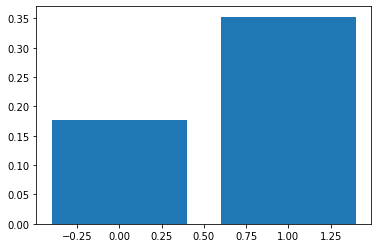

In [362]:

# get scores
importance = logreg_model.coef_[0]
# summarize feature scores
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature scores
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [363]:
# As it can be seen, two features have a negative correlation with the output and two positive correlation contributing to the offer acceptance, the negative ones makes sense since the average rate of acceptance is around 20%.
# So the variables having positive score help with increasing the acceptance rate.

#features_importance_lr = np.absolute(1/features_score_lr)
#features_importance_lr = features_importance_lr/features_importance_lr.sum()

features_importance_lr=features_score_lr

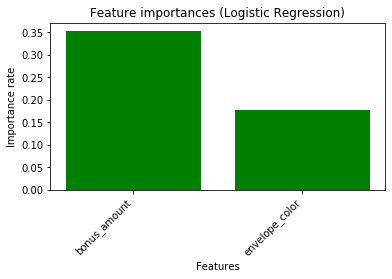

In [364]:
feature_names = df_binary.columns.values
n=2 #number of variables 
indices = np.argsort(features_importance_lr)[::-1]
plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(n), features_importance_lr[indices[:n]], color="g", align="center")
plt.xticks(range(n), feature_names[indices[:n]], rotation=45, ha='right')
plt.ylabel("Importance rate")
plt.xlabel("Features")
plt.subplots_adjust(bottom=0.3)
plt.show()
print()

## 2 - Random Forest

In [376]:
#by building a Random Forest model we can get the feature importance values of each feature

model_name = "Random Forest"
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=None)
#class_weight='balanced',max_depth=5,max_features='sqrt',n_estimators=300,random_state=24
random_forest_model.fit(z_train, y_train)
test_pred = random_forest_model.predict(z_test)
test_prob = random_forest_model.predict_proba(z_test)[:, 1]
test_prob=test_pred
accuracy, fpr, tpr = score_calc(model_name, y_test, test_pred, test_prob)

features_importance_rf = random_forest_model.feature_importances_
features_importance_rf

Random Forest - Performance on validation data: 
	Accuracy:	82.58


array([0.20332113, 0.79667887])

## Random Forest Hyperparameter Tuning

In [377]:
# hyper parameter optimization of Random Forest using RandomizedSearchCV


param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9],
}

#grid_search = GridSearchCV(RandomForestClassifier(),
#                           param_grid=param_grid)
#grid_search.fit(z_train, y_train)
#print(grid_search.best_estimator_)


random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)



RandomForestClassifier(max_features='log2', max_leaf_nodes=6, n_estimators=25)


In [379]:
# training the model on optimized values of parameters

model_random = RandomForestClassifier(max_depth=None,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=25)

model_random.fit(z_train, y_train)
y_pred_rand = model_random.predict(z_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90    200000
           1       0.00      0.00      0.00         0

    accuracy                           0.83    200000
   macro avg       0.50      0.41      0.45    200000
weighted avg       1.00      0.83      0.90    200000



## Feature Importance Visualization for Random Forest

Feature: 0, Score: 0.20148
Feature: 1, Score: 0.79852


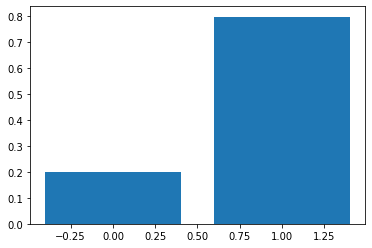

In [380]:
importance = model_random.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

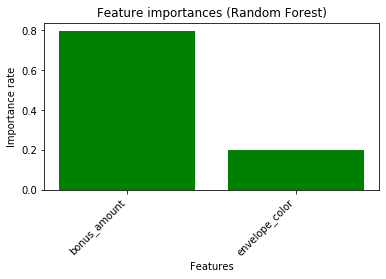

In [381]:
n=2 #number of variables 
feature_names = df_binary.columns.values
indices = np.argsort(importance)[::-1]
plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(n), importance[indices[:n]], color="g", align="center")
plt.xticks(range(n), feature_names[indices[:n]], rotation=45, ha='right')
plt.ylabel("Importance rate")
plt.xlabel("Features")
plt.subplots_adjust(bottom=0.3)
plt.show()
print()

## 3 - Neural Network

In [382]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

In [384]:
model = Sequential()

model.add(layers.Dense(32, input_dim=2, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z_train_keras = np.array(z_train)
y_train_keras = np.array(y_train)
#print(z_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

model.fit(np.array(z_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)


Epoch 1/10
6250/6250 [==============================] - 28s 4ms/step - loss: 0.4536 - accuracy: 0.8250
Epoch 2/10
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4526 - accuracy: 0.8253
Epoch 3/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4525 - accuracy: 0.8253
Epoch 4/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4525 - accuracy: 0.8253
Epoch 5/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.4525 - accuracy: 0.8253
Epoch 6/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4524 - accuracy: 0.8253
Epoch 7/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.4524 - accuracy: 0.8253
Epoch 8/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.4524 - accuracy: 0.8253
Epoch 9/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.4524 - accuracy: 0.8253
Epoch 10/10
6250/6250 [==============================] - 15s 2ms/step - l

In [385]:
scores = model.evaluate(np.array(z_test), np.array(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6250/6250 [==============================] - 10s 2ms/step - loss: 0.4517 - accuracy: 0.8258

accuracy: 82.58%


## Neural Network feature importance

In [386]:
from sklearn.inspection import permutation_importance

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the neural network on the training set
#model.fit(z_train, y_train)

# Evaluate the model performance on the testing set
test_loss, test_acc = model.evaluate(z_test, y_test)


6250/6250 [==============================] - 12s 2ms/step - loss: 0.4517 - accuracy: 0.8258


6250/6250 [==============================] - 13s 2ms/step
Feature 0: 0.01009
Feature 1: 0.03442


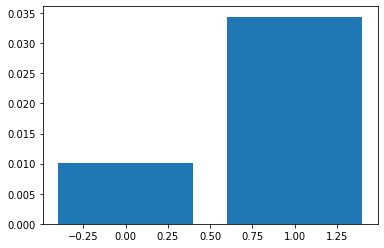

In [387]:
# Calculate the baseline performance
baseline = test_acc

# Calculate the feature importance scores
#scoring = ['neg_mean_squared_error']

results = permutation_importance(model, z_test, y_test, n_repeats=10, random_state=42, scoring='explained_variance')
importance = results.importances_mean

# Print the feature importance scores
for i,v in enumerate(importance):
    print('Feature %d: %.5f' % (i,v))

# Plot the feature importance chart
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [388]:
importance

array([0.01009297, 0.03442162])

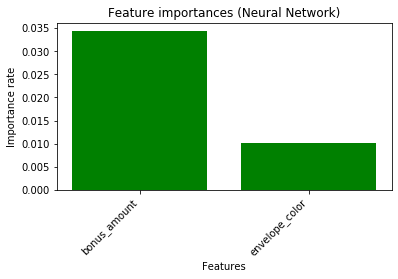

In [389]:
n=2 #number of variables 
feature_names = df_binary.columns.values
indices = np.argsort(importance)[::-1]
plt.figure()
plt.title("Feature importances (Neural Network)")
plt.bar(range(n), importance[indices[:n]], color="g", align="center")
plt.xticks(range(n), feature_names[indices[:n]], rotation=45, ha='right')
plt.ylabel("Importance rate")
plt.xlabel("Features")
plt.subplots_adjust(bottom=0.3)
plt.show()
print()

In [79]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

## Conclusion and Summary